<a href="https://colab.research.google.com/github/iTosy/All_Mod_for_uncoded/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install autoconf
!sudo apt-get install libtool
!sudo apt-get install liblapack-dev libblas-dev libfftw3-dev
!rm -rf itpp
!git clone https://github.com/iamviji/itpp.git # original one had compilation issue, did minor signle line change after forking
!ls;cd itpp;ls;mkdir -p build1 build2; cd build1 ; cmake cmake ..;make ;make install
!rm -rf py-itpp
!git clone https://github.com/vidits-kth/py-itpp.git
!pip3 install pybind11
!cd py-itpp;./install_prerequisites_python3.sh;make install;pip3 install -e .
!cd py-itpp; ls ; pip3 install -e .
!cat py-itpp/setup.py
#following 3 lines are added to resolve the issue
import sys
sys.path.append('./py-itpp/lib')
!cp -rf py-itpp/lib/itpp py-itpp/lib/pyitpp # import itpp is not working, after this hack i started to work


Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11.1).
autoconf set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libtool-doc gcj-jdk
The following NEW packages will be installed:
  libtool
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 161 kB of archives.
After this operation, 1,227 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Fetched 161 kB in 0s (748 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable 

In [2]:
import tensorflow as tf
import numpy as np


In [3]:
import pyitpp as itpp
from matplotlib import pyplot as plt
import cmath

In [20]:
def _PSK(snr_db, block_size, numofMod, source_bits, rate):    
  '''Modulate the bits'''

  modulator_ = itpp.comm.PSK(numofMod)
  tx_signal = modulator_.modulate_bits(source_bits)


  '''
  modulator_ = itpp.comm.modulator_2d()
  constellation = itpp.cvec('-1-0i, 1+0i')
  symbols = itpp.ivec('0, 1')
  modulator_.set(constellation, symbols)
  tx_signal = modulator_.modulate_bits(source_bits) 
  print(type(tx_signal[0]))
  '''

  
  '''Add the effect of channel to the signal'''
  
  noise_variance = 10 ** ((0-snr_db) * 0.1)
  channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
  rx_signal = channel(tx_signal)
  



  '''
  noise_variance = 1.0 / (rate * pow(10, 0.1 * snr_db))
  noise = itpp.randn_c(tx_signal.length())
  noise *= itpp.math.sqrt(noise_variance)
  rx_signal = tx_signal + noise
  '''
  x=[]
  y=[]
  for i in range(rx_signal.length()):
    x.append(rx_signal[i].real)
    y.append(rx_signal[i].imag)


  plt.scatter(x, y, s=0.2)
  plt.ylabel('Imaginary')
  plt.xlabel('Real')
  plt.show()

    
  '''Demodulate the signal'''
  demodulated_bits = modulator_.demodulate_bits(rx_signal)

  '''Calculate the block error ratio'''
  blerc = itpp.comm.BLERC(block_size)
  blerc.count(source_bits, demodulated_bits)
  print("BLER for %d PSK" %numofMod)
  print(blerc.get_errorrate())

In [24]:
def _QAM(snr_db, block_size, numofMod, source_bits, rate):    
  '''Modulate the bits'''

  modulator_ = itpp.comm.QAM(numofMod)
  tx_signal = modulator_.modulate_bits(source_bits)


  '''
  modulator_ = itpp.comm.modulator_2d()
  constellation = itpp.cvec('-1-0i, 1+0i')
  symbols = itpp.ivec('0, 1')
  modulator_.set(constellation, symbols)
  tx_signal = modulator_.modulate_bits(source_bits) 
  print(type(tx_signal[0]))
  '''

  
  '''Add the effect of channel to the signal'''
  
  noise_variance = 10 ** ((0-snr_db) * 0.1)
  channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
  rx_signal = channel(tx_signal)
  



  '''
  noise_variance = 1.0 / (rate * pow(10, 0.1 * snr_db))
  noise = itpp.randn_c(tx_signal.length())
  noise *= itpp.math.sqrt(noise_variance)
  rx_signal = tx_signal + noise
  '''
  x=[]
  y=[]
  for i in range(rx_signal.length()):
    x.append(rx_signal[i].real)
    y.append(rx_signal[i].imag)


  plt.scatter(x, y, s=0.2)
  plt.ylabel('Imaginary')
  plt.xlabel('Real')
  plt.show()

    
  '''Demodulate the signal'''
  demodulated_bits = modulator_.demodulate_bits(rx_signal)

  '''Calculate the block error ratio'''
  blerc = itpp.comm.BLERC(block_size)
  blerc.count(source_bits, demodulated_bits)
  print("BLER for %d QAM" %numofMod)
  print(blerc.get_errorrate())

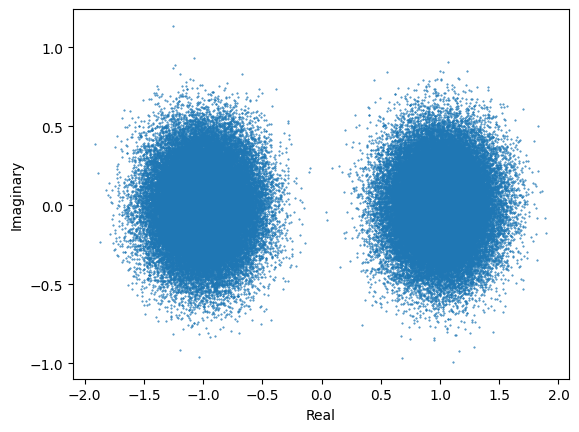

BLER for 2 PSK
0.0


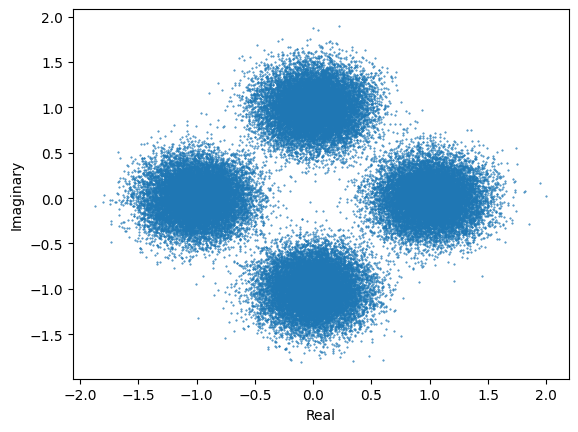

BLER for 4 PSK
0.003


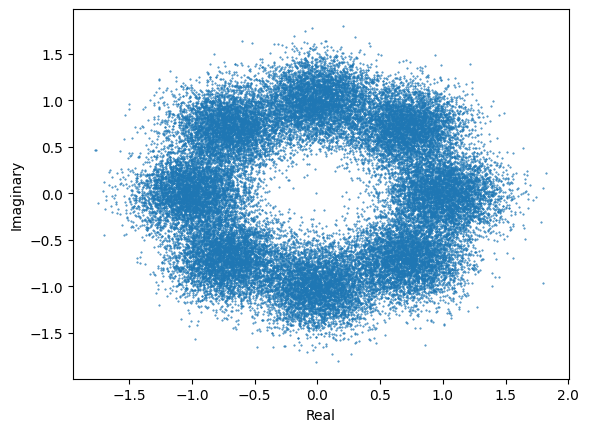

BLER for 8 PSK
0.11023333333333334


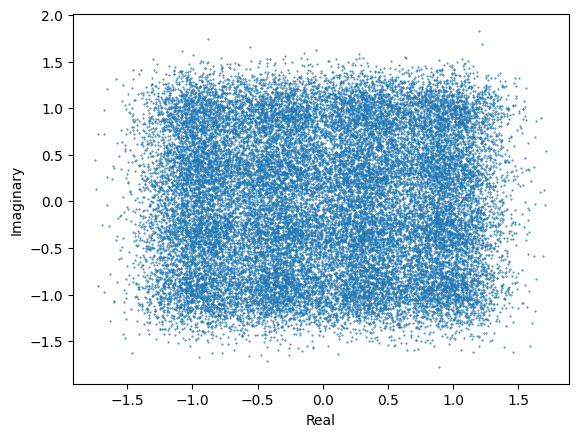

BLER for 16 QAM
0.2252


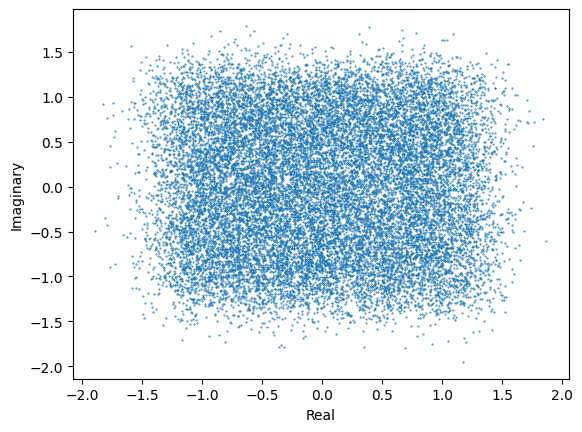

BLER for 64 QAM
0.5139


In [26]:
snr_db = 10
block_size = 4
'''Generate random bits'''
nrof_bits = 3 * 10000 * block_size
source_bits = itpp.randb(nrof_bits)
rate = 1.0

_PSK(snr_db, block_size, 2, source_bits, rate)
_PSK(snr_db, block_size, 4, source_bits, rate)
_PSK(snr_db, block_size, 8, source_bits, rate)
_QAM(snr_db, block_size, 16, source_bits, rate)
_QAM(snr_db, block_size, 64, source_bits, rate)